In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



## Read data

First, let's read both data files and check some rows

In [2]:
titanic_data = pd.read_csv("./input/titanic/train.csv")
test_data = pd.read_csv("./input/titanic/test - test.csv")
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Get some information about dataset

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe some properties of numerical features

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the previous data we have:
* Missing data 3 columns with missing data (Age,Cabin, Embarked)
* Categorical data 5 columns (Name, Sex, Ticket, Cabin, Embarked)
* Numerical data 6 columns ([PassengerId], Survived, Pclass, Age, SibSp, Parch, Fare)

Determine the type of numerical data
* Binary data (Survived)
* Continuous data (Fare, Age)
* Categorical data encoded (Pclass, SibSp, Parch)

In [5]:
print('Survived:', titanic_data.Survived.unique())
print('Pclass:', titanic_data.Pclass.unique())
print('SibSp:', titanic_data.SibSp.unique())
print('Parch:', titanic_data.Parch.unique())


Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


## Missing Data

From original info, we can see missing data in the columns : Age, Cabid and Embarked

In [6]:
print('Null Training data %:\n')

print(titanic_data.isnull().mean())

print('\nNull Test data data %:\n')
print(test_data.isnull().mean())


Null Training data %:

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Null Test data data %:

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


We fill missing data on both, training and test data

In training data:
* Embarked ( 2 values ). We use the mode -most repeated value- to fill missing data
* Cabin (77% missing). We do not have data to fill. So we fill data with 'Missing' label
* Age (19.8% missing). In this case we use mean for the continuous variable

In test data:
* Cabin and age, the same approach than in training data
* Fare, we use mean

In [7]:
pd.to_numeric(test_data['Fare'],errors='coerce',).describe()

count    405.000000
mean      84.748402
std      166.188349
min        0.000000
25%        7.879200
50%       14.500000
75%       59.400000
max      831.583000
Name: Fare, dtype: float64

In [8]:

test_data['Fare'] = pd.to_numeric(test_data['Fare'],errors='coerce')
## fill missing data 

# embarked, only 2 values not filled. We take the mode as the value to fill na
embarked_mode = titanic_data['Embarked'].mode().values[0]
titanic_data['Embarked'].fillna(embarked_mode, inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
titanic_data['Cabin'].fillna('Missing', inplace=True) 

# age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# deck, too much info without fill. Any fill with a data it is not enough
test_data['Cabin'].fillna('Missing', inplace=True) 

# age
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)




## Encode categorical data
(Name, Sex, Ticket, Cabin, Embarked)

Let's first try to get an idea of the labels in each feature


In [9]:
print('Sex values:',titanic_data.Sex.unique(), test_data.Sex.unique())
print('Ticket values:',titanic_data.Ticket.unique().size,test_data.Ticket.unique().size)
print('Cabin values:',titanic_data.Cabin.unique().size,test_data.Cabin.unique().size)
print('Embarked values:',titanic_data.Embarked.unique(), test_data.Embarked.unique())

Sex values: ['male' 'female'] ['male' 'female']
Ticket values: 681 363
Cabin values: 148 77
Embarked values: ['S' 'C' 'Q'] ['Q' 'S' 'C']


Let's use onehot encodig for these characteristics having a fix value set. I also want to use the same approach for Pclass attribute. Althought it is already defined as an integer, it is a numeric representation for a class with fixed valueds. We will consider as fixed Sex & Embarked.
For the rest, we will use label encoder

In [10]:


temp = pd.get_dummies(titanic_data[['Sex']]) 
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Sex']]) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Pclass']].astype(str)) 
temp.head()
titanic_data = titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Pclass']].astype(str)) 
test_data = test_data.join(temp)

temp = pd.get_dummies(titanic_data[['Embarked']]) 
titanic_data= titanic_data.join(temp)

temp = pd.get_dummies(test_data[['Embarked']]) 
test_data= test_data.join(temp)


## Label encoder
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
le.fit(titanic_data['Ticket']) 
titanic_data['Ticket'] = le.transform(titanic_data['Ticket']) 

le = LabelEncoder() 
le.fit(test_data['Ticket']) 
test_data['Ticket'] = le.transform(test_data['Ticket'])


le = LabelEncoder() 
le.fit(titanic_data['Cabin']) 
titanic_data['Cabin'] = le.transform(titanic_data['Cabin']) 

le = LabelEncoder() 
le.fit(test_data['Cabin']) 
test_data['Cabin'] = le.transform(test_data['Cabin'])





In [11]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,146,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,81,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,146,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,55,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,146,S,0,1,0,0,1,0,0,1


## Feature scaling

For Fare & Age we will use a different approach using L2 normalization. L2 normalization will change the distribution of ower data. First let's plot histograms of both properties



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

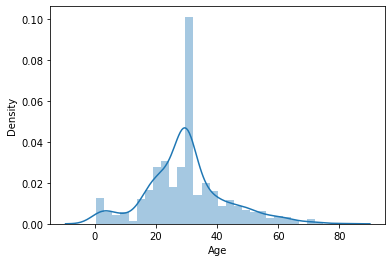

In [13]:
sns.distplot(titanic_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

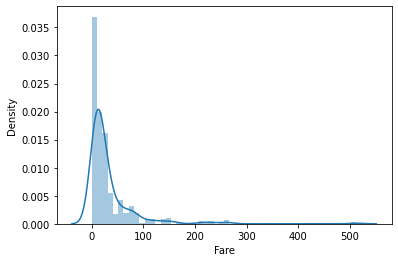

In [14]:
sns.distplot(titanic_data['Fare'])

In [15]:
from sklearn.preprocessing import StandardScaler 


data_unscaled = titanic_data[['Age','Fare']]

data_unscaled = data_unscaled.append(test_data[['Age','Fare']])

scaler = StandardScaler() 
scaler.fit(data_unscaled) 
data_scaled = scaler.transform(data_unscaled)

titanic_data_scaled = data_scaled[:titanic_data.shape[0]]
test_data_scaled    = data_scaled[titanic_data.shape[0]+1:]

titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = data_unscaled.columns) 
test_data_scaled = pd.DataFrame(test_data_scaled, columns = data_unscaled.columns) 


print(titanic_data_scaled.shape, test_data_scaled.shape)


(891, 2) (417, 2)


Let's check data has been normalized

In [16]:
test_data_scaled.info

<bound method DataFrame.info of           Age      Fare
0    1.329138 -0.403924
1    2.493840 -0.378067
2   -0.223797 -0.387929
3   -0.612031 -0.353053
4   -1.233205 -0.382517
..        ...       ...
412  0.030309 -0.393822
413  0.707964  0.576469
414  0.669141 -0.401519
415  0.030309 -0.393822
416  0.030309  1.679850

[417 rows x 2 columns]>

In [17]:
titanic_data[['Age','Fare']] = titanic_data_scaled[['Age','Fare']]
test_data[['Age','Fare']] = test_data_scaled[['Age','Fare']]

Let's see how the distribution has change

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

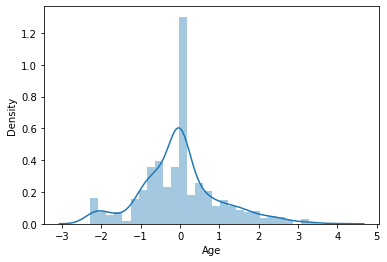

In [18]:
sns.distplot(titanic_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

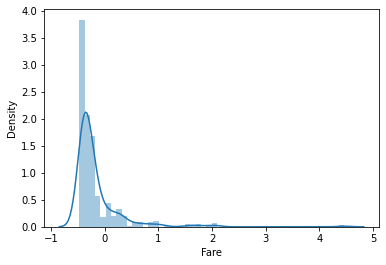

In [19]:
sns.distplot(titanic_data['Fare'])

## Get the train and test dataset

Although we can do a lot of more pre-processing on the data, such as discretization of continuous data, or outlier detection, we will stop here and generate the final train and test datasets by selecting appropiated columns

In [20]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,1.329138,0,0,152,-0.403924,76,Q,0,1,0,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.493840,1,0,221,-0.378067,76,S,1,0,0,0,1,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,-0.223797,0,0,73,-0.387929,76,Q,0,1,0,1,0,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,-0.612031,0,0,147,-0.353053,76,S,0,1,0,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-1.233205,1,1,138,-0.382517,76,S,1,0,0,0,1,0,0,1


<AxesSubplot:ylabel='Fare'>

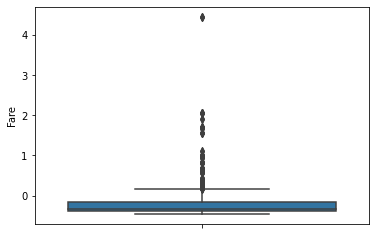

In [21]:
sns.boxplot(y=titanic_data['Fare'])

<AxesSubplot:ylabel='Age'>

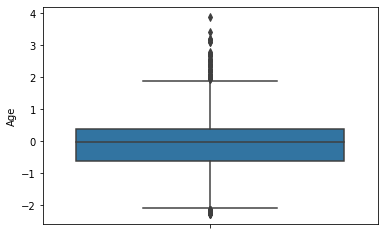

In [22]:
sns.boxplot(y=titanic_data['Age'])

In [23]:
IQR = titanic_data["Fare"].quantile(0.75) - titanic_data["Fare"].quantile(0.25)
lower_fare_limit = titanic_data["Fare"].quantile(0.25) - (IQR * 1.5) 
upper_fare_limit = titanic_data["Fare"].quantile(0.75) + (IQR * 1.5)
print(lower_fare_limit) 
print(upper_fare_limit) 

-0.7283873401259331
0.16020507461537986


In [24]:

titanic_data["Fare"]= np.where(titanic_data["Fare"] > upper_fare_limit, upper_fare_limit,
                               np.where(titanic_data["Fare"] < lower_fare_limit, lower_fare_limit, titanic_data["Fare"]))

test_data["Fare"]= np.where(test_data["Fare"] > upper_fare_limit, upper_fare_limit,
                               np.where(test_data["Fare"] < lower_fare_limit, lower_fare_limit, test_data["Fare"]))



<AxesSubplot:ylabel='Fare'>

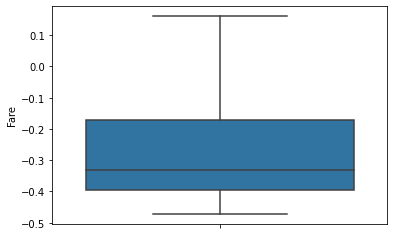

In [25]:
sns.boxplot(y=titanic_data['Fare'])

In [26]:
IQR = titanic_data["Age"].quantile(0.75) - titanic_data["Age"].quantile(0.25)
lower_fare_limit = titanic_data["Age"].quantile(0.25) - (IQR * 1.5) 
upper_fare_limit = titanic_data["Age"].quantile(0.75) + (IQR * 1.5)
print(lower_fare_limit) 
print(upper_fare_limit) 

-2.126142712259532
1.911489247684462


In [27]:

titanic_data["Age"]= np.where(titanic_data["Age"] > upper_fare_limit, upper_fare_limit,
                               np.where(titanic_data["Age"] < lower_fare_limit, lower_fare_limit, titanic_data["Age"]))

test_data["Age"]= np.where(test_data["Age"] > upper_fare_limit, upper_fare_limit,
                               np.where(test_data["Age"] < lower_fare_limit, lower_fare_limit, test_data["Age"]))




<AxesSubplot:ylabel='Age'>

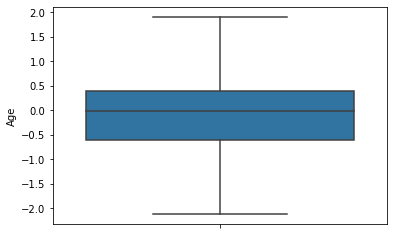

In [28]:
sns.boxplot(y=titanic_data['Age'])

In [29]:
#selected_x_columns = ['Age','SibSp','Parch','Ticket','Fare','Cabin', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q' ]

selected_x_columns = ['Age','Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3' ]
train_x = titanic_data[selected_x_columns]
test_x =  test_data[selected_x_columns]

train_y = titanic_data['Survived']
test_y = test_data['Survived']


In [30]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [31]:
print(train_x.shape, test_x.shape)

(891, 7) (418, 7)


Let's generate a simple Keras model with a standard NN using the following layers 
Input Layer = 14
Hidden Layers = 30, 60, 30, 16
Output Layer = 1

We will use RELU activation for hidden layers and SIGMOID for output layer

We do not include neither dropout nor other reguralization techniques 

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


model = Sequential()

model.add(Dense(20, input_dim=train_x.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
...
# fit the keras model on the dataset
model.fit(train_x, train_y, validation_split=0.33, epochs=300, batch_size=60, verbose = 0)

model.evaluate(test_x,test_y)


14/14 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7392


[nan, 0.739234447479248]

In [33]:

test_y = model.predict(test_x)
test_y = np.where(test_y>0.8, 1,0)



<ipython-input-33-c717474fcf93>:2: RuntimeWarning: invalid value encountered in greater
  test_y = np.where(test_y>0.8, 1,0)


In [34]:
test_y.shape

(418, 1)

In [35]:
result = test_data.drop(columns='Survived').join(pd.DataFrame(test_y, columns=['Survived']))
result = result[['PassengerId', 'Survived']]

In [36]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


We got it. Let's submit our results

In [37]:
result.to_csv('submission.csv', index=False)